In [100]:
from PIL import Image, ImageDraw

In [111]:
from surya.detection import batch_text_detection
from surya.model.detection.segformer import load_model, load_processor

image = Image.open("test-1.jpg")
model, processor = load_model(), load_processor()

# predictions is a list of dicts, one per image
predictions = batch_text_detection([image], model, processor)


Loaded detection model vikp/surya_det2 on device cpu with dtype torch.float32


Detecting bboxes: 100%|██████████| 1/1 [00:04<00:00,  4.93s/it]


In [112]:
print(predictions)

[TextDetectionResult(bboxes=[PolygonBox(polygon=[[520, 5], [880, 0], [880, 39], [521, 47]], confidence=0.7095099687576294, bbox=[520, 5, 880, 39]), PolygonBox(polygon=[[743, 63], [884, 69], [884, 96], [742, 90]], confidence=0.875278115272522, bbox=[743, 63, 884, 96]), PolygonBox(polygon=[[450, 136], [885, 117], [886, 154], [451, 172]], confidence=0.7416505217552185, bbox=[450, 136, 885, 154]), PolygonBox(polygon=[[754, 178], [890, 192], [888, 222], [753, 209]], confidence=0.8649486303329468, bbox=[754, 178, 890, 222]), PolygonBox(polygon=[[51, 285], [881, 237], [882, 277], [52, 325]], confidence=0.8221909403800964, bbox=[51, 277, 881, 285]), PolygonBox(polygon=[[50, 320], [892, 282], [893, 326], [51, 364]], confidence=0.7901878356933594, bbox=[50, 320, 892, 326]), PolygonBox(polygon=[[47, 367], [895, 325], [896, 363], [48, 405]], confidence=0.8682074546813965, bbox=[47, 363, 895, 367]), PolygonBox(polygon=[[47, 411], [896, 368], [897, 407], [48, 449]], confidence=0.888444721698761, bbo

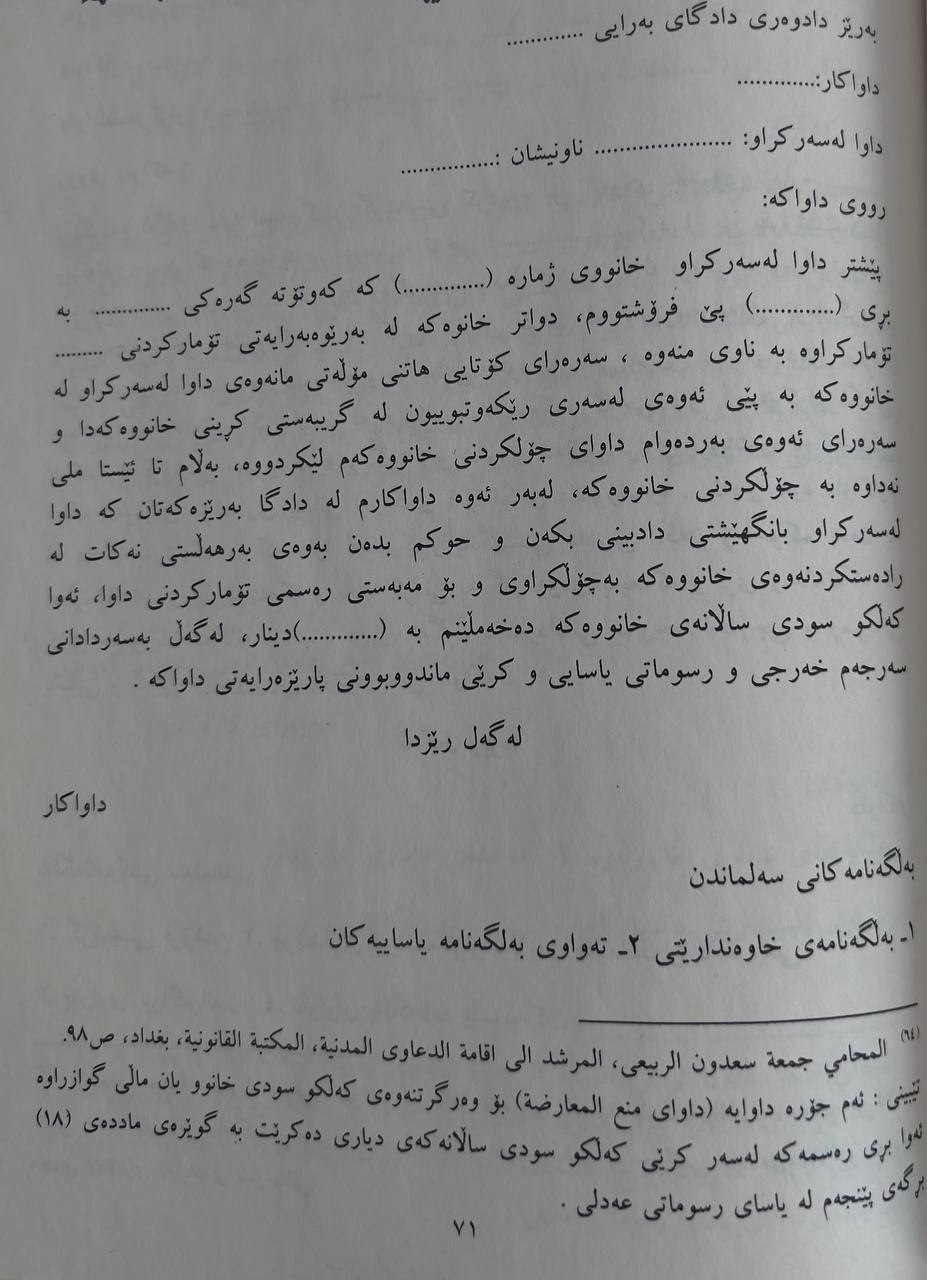

In [113]:
image

In [114]:
all_bboxes = []
# Iterate over the predictions
for prediction in predictions:
    # Iterate over each PolygonBox in the bboxes list
    for polygon_box in prediction.bboxes:
        # Extract the bbox (bounding box) attribute and append it to all_bboxes
        all_bboxes.append(polygon_box.bbox)

In [115]:
print(all_bboxes)

[[520, 5, 880, 39], [743, 63, 884, 96], [450, 136, 885, 154], [754, 178, 890, 222], [51, 277, 881, 285], [50, 320, 892, 326], [47, 363, 895, 367], [47, 407, 896, 411], [44, 450, 901, 453], [44, 491, 904, 496], [43, 536, 905, 541], [42, 581, 907, 586], [41, 618, 906, 636], [126, 662, 910, 687], [397, 726, 527, 750], [40, 789, 110, 818], [682, 863, 920, 884], [311, 925, 926, 963], [55, 1022, 926, 1078], [31, 1061, 926, 1130], [30, 1107, 926, 1176], [557, 1191, 926, 1210], [445, 1216, 481, 1240]]


In [119]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [143]:

def crop_image_polygon(image, polygon):
    # Extract polygon points
    points = [tuple(point) for point in polygon.polygon]

    # Determine the bounding box of the polygon
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    x1, x2 = min(x_coords), max(x_coords)
    y1, y2 = min(y_coords), max(y_coords)

    # Crop the image using the bounding box
    cropped_image = image.crop((x1, y1, x2, y2))

    # Create a mask for the polygon
    mask = Image.new('L', (x2 - x1, y2 - y1), 0)
    draw = ImageDraw.Draw(mask)
    # Shift polygon points to match the cropped image coordinates
    shifted_points = [(x - x1, y - y1) for x, y in points]
    draw.polygon(shifted_points, fill=255)

    # Apply the mask to create transparency
    cropped_image = cropped_image.convert("RGBA")
    cropped_image.putalpha(mask)

    return cropped_image

# Function to check if a point is inside a polygon
def is_point_inside_polygon(x, y, poly):
    """
    Determine if a point is inside a given polygon or not.
    Polygon is a list of (x, y) pairs.
    """
    n = len(poly)
    inside = False
    p1x, p1y = poly[0]
    for i in range(n + 1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside

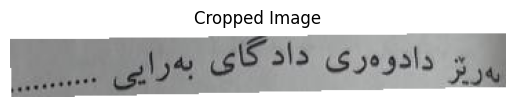

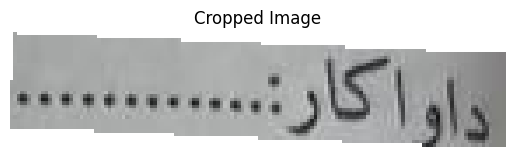

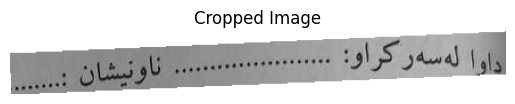

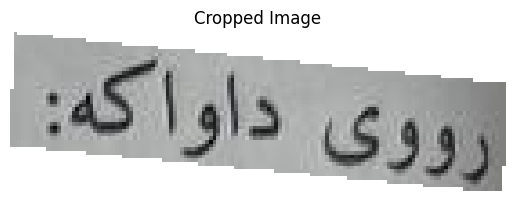

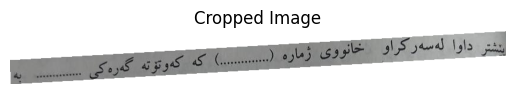

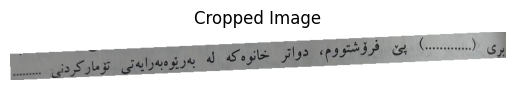

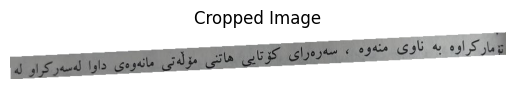

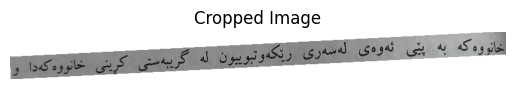

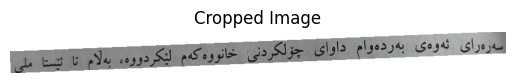

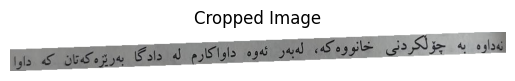

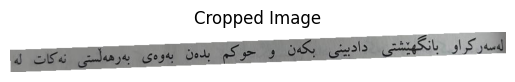

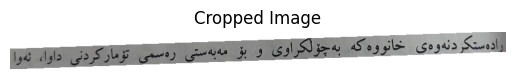

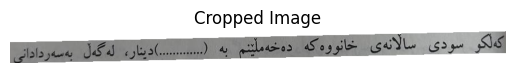

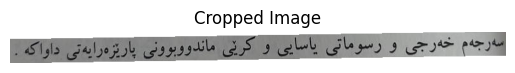

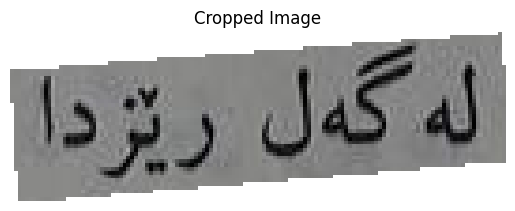

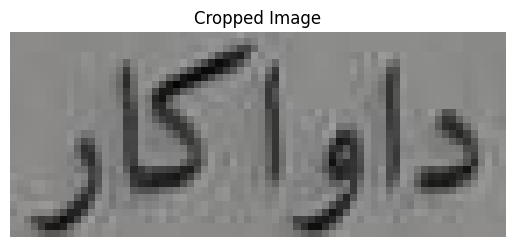

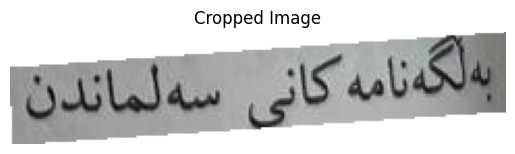

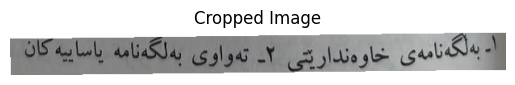

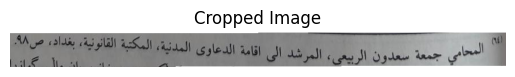

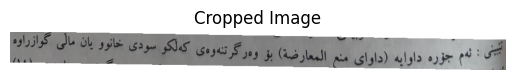

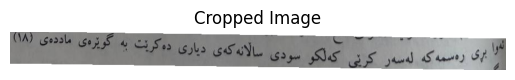

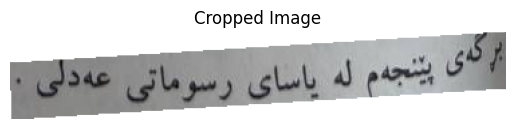

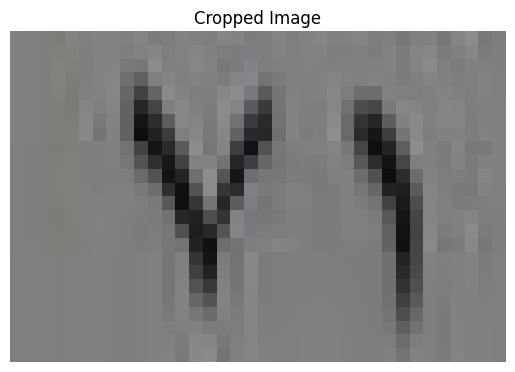

In [144]:
for prediction in predictions:
    for polygon_box in prediction.bboxes:
        # Crop using polygon points
        cropped_image = crop_image_polygon(image, polygon_box)
        
        # Display the cropped image
        plt.figure()
        plt.imshow(cropped_image)
        plt.title('Cropped Image')
        plt.axis('off')
        plt.show()